In [1]:
import xarray as xr

# from credit.models.skebs_model import SKEBS
from matplotlib import pyplot as plt
import numpy as np
import torch_harmonics as harmonics
from credit.physics_constants import PI, RAD_EARTH, OMEGA, GRAVITY
import torch
from credit.xr_sampler import XRSamplerByYear 
from glob import glob
from os.path import join


In [3]:
eval_fh = 48
rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train"
rollout_files = glob(join(rollout_dir, f"2012*/*{eval_fh:03}.nc")) + glob(join(rollout_dir, f"2013*/*{eval_fh:03}.nc"))


In [4]:
rollout_files = rollout_files[:2]

In [5]:
# setup SHT
ds = xr.open_dataset(rollout_files[0])
nlat, nlon = len(ds.latitude), len(ds.longitude)
grid = "equiangular"
sht = harmonics.RealSHT(
    nlat, nlon, grid=grid, csphase=False
)

In [6]:
U_tensor = torch.tensor(ds.U.isel(level=21).values)

In [ ]:
def get_spectrum(ds):
    

def calculate_spectra(spectral_coef):
    # lmax = spectral_coef.shape[-1]
    # spectra = np.zeros((spectral_coef.shape[:-2], lmax))
    # squared_coef = torch.abs(spectral_coef) ** 2
    # for i in range(lmax):
    #     spectra[i] = np.sum(squared_coef[..., i:, i])
    spectrum = torch.sum(torch.abs(spectral_coef) ** 2, axis = -1)
    # re-scale power spectrum based on the mean circumference per longitude
    cos_latitudes = np.cos(np.deg2rad(ds.latitude))
    normalization_factor = (RAD_EARTH * np.sum(cos_latitudes)) / nlon
    
    # spectrum = spectrum * float(normalization_factor)
    return spectrum    

In [52]:
def calculate_spectra2(spectral_coef):
    # lmax = spectral_coef.shape[-1]
    # spectra = np.zeros((spectral_coef.shape[:-2], lmax))
    # squared_coef = torch.abs(spectral_coef) ** 2
    # for i in range(lmax):
    #     spectra[i] = np.sum(squared_coef[..., i:, i])
    spectrum = torch.sum(torch.triu(torch.abs(spectral_coef) ** 2), axis = -2)
    # re-scale power spectrum based on the mean circumference per longitude
    cos_latitudes = np.cos(np.deg2rad(ds.latitude))
    normalization_factor = (RAD_EARTH * np.sum(cos_latitudes)) / nlon
    
    # spectrum = spectrum * float(normalization_factor)
    return spectrum    


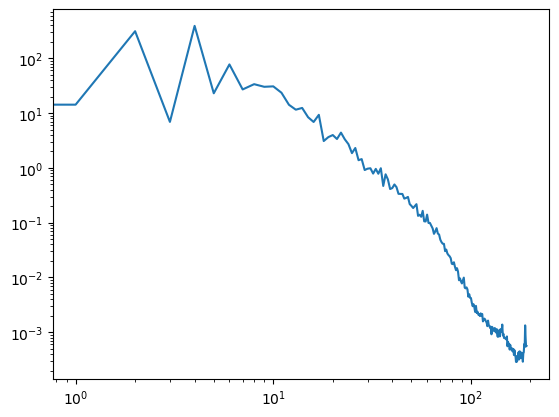

In [ ]:
power = calculate_spectra(coef).squeeze()
plt.plot(np.arange(power.shape[-1]), power[0])
power2 = calculate_spectra2(coef).squeeze()
# plt.plot(np.arange(power.shape[-1]), power2[0], c='r')

plt.xscale('log')
plt.yscale('log')

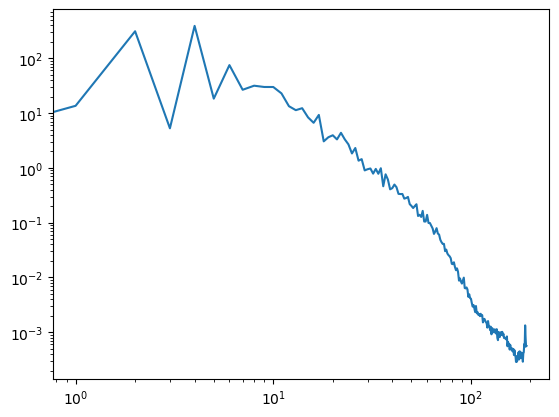

In [25]:
plt.plot(np.arange(power.shape[-1]), power[0] - power2[0])
plt.xscale('log')
plt.yscale('log')

In [47]:
sampler = XRSamplerByYear("/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/model.yml")
ds_true = sampler(ds.time.values[0])

In [74]:
ds_true.U.isel(level=21).min().values

array(-25.674574, dtype=float32)

In [68]:
U_tensor = torch.tensor(ds_true.U.isel(level=21).values)
V_tensor = torch.tensor(ds_true.V.isel(level=21).values)
wind_tensor = torch.stack([U_tensor.squeeze(), V_tensor.squeeze()])

Text(0.5, 1.0, '2012-06-09T00:00:00.000000000')

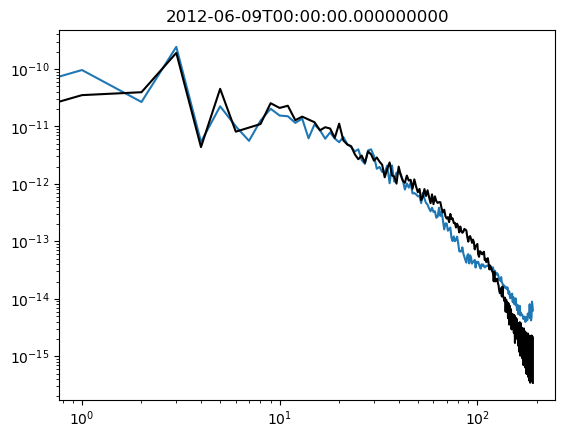

In [69]:
vrt_spec = calculate_spectra(coef[0])
plt.plot(np.arange(vrt_spec.shape[0]), vrt_spec)
plt.plot(np.arange(vrt_spec.shape[0]), calculate_spectra(vsht(wind_tensor)[0]), c='0')
plt.yscale('log')
plt.xscale('log')
plt.title(f"{ds.time.values[0]}")

Text(0.5, 1.0, '2012-06-09T00:00:00.000000000')

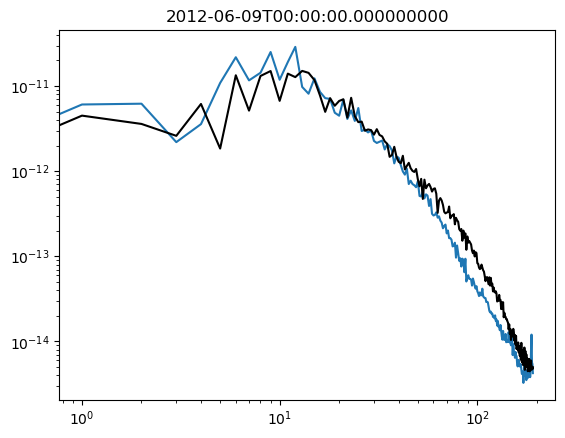

In [70]:
plt.plot(np.arange(vrt_spec.shape[0]), calculate_spectra(coef[1]))
plt.plot(np.arange(vrt_spec.shape[0]), calculate_spectra(vsht(wind_tensor)[1]), c='0')
plt.yscale('log')
plt.xscale('log')
plt.title(f"{ds.time.values[0]}")

In [53]:
vrt_spec.shape

torch.Size([192])